In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

import itertools
import os

%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

In [3]:
data_path = r"C:\Users\gufra\Desktop\Work\Projects\AI\ALL_Classification\Datasets\CSV"
os.listdir(data_path)

['densenet.csv',
 'inceptionresnetv2.csv',
 'inceptionresnetv2_densenet.csv',
 'mobilenetv2.csv',
 'mobilenetv2_densenet_struct_lab.csv',
 'resnet101.csv',
 'vgg16.csv',
 'vgg16_densenet.csv',
 'vgg16_inceptionresnetv2.csv',
 'vgg16_inceptionresnetv2_densenet.csv',
 'vgg16_inceptionresnetv2_densenet_lab.csv',
 'vgg19.csv']

In [4]:
df = pd.read_csv(os.path.join(data_path,'densenet.csv'))
df['class'] = df['class'].apply(lambda x: int(x))

In [5]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,class
0,0.000180,0.002082,0.002710,0.003275,0.111805,1.031791,0.000518,0.004765,0.094782,0.000091,...,0.444196,0.216916,0.287620,0.740163,0.680220,0.062220,0.810256,0.341806,0.025805,1
1,0.000202,0.002625,0.002906,0.003409,0.099685,1.123021,0.000475,0.004743,0.083355,0.000091,...,0.869199,0.152130,0.860650,0.597866,1.251399,0.042948,0.807751,0.506824,0.115129,1
2,0.000160,0.002067,0.003312,0.003497,0.096229,1.184450,0.000435,0.004603,0.085954,0.000102,...,0.892394,0.118417,0.563555,0.596464,1.736280,0.060204,0.797200,0.499172,0.055098,1
3,0.000167,0.002056,0.002470,0.003671,0.108128,1.104996,0.000488,0.004682,0.083429,0.000104,...,0.963713,0.233798,0.219680,0.328323,1.329551,0.080187,0.867821,0.449551,0.073328,1
4,0.000144,0.002883,0.002294,0.003520,0.110649,1.026114,0.000646,0.004774,0.109927,0.000114,...,0.742887,0.052523,0.418466,0.501501,0.791998,0.015683,0.615091,0.540352,0.003211,1


In [6]:
df.shape

(10661, 1025)

In [7]:
scaler = MinMaxScaler()
sdf = scaler.fit_transform(df)
df = pd.DataFrame(sdf, columns=df.columns)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['class'],axis=1), df['class'], test_size = 0.1, random_state=1, stratify=df['class'])

In [86]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric = "minkowski")
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
svm_classifier = SVC(kernel = 'linear')
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [88]:
k_svm_classifier = SVC(kernel = 'rbf')
k_svm_classifier.fit(x_train, y_train)

SVC()

In [89]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [90]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

KNN
Confusion matrix, without normalization
[[252  87]
 [ 60 668]]
Accuracy =                precision    recall  f1-score   support

         0.0     0.8077    0.7434    0.7742       339
         1.0     0.8848    0.9176    0.9009       728

    accuracy                         0.8622      1067
   macro avg     0.8462    0.8305    0.8375      1067
weighted avg     0.8603    0.8622    0.8606      1067



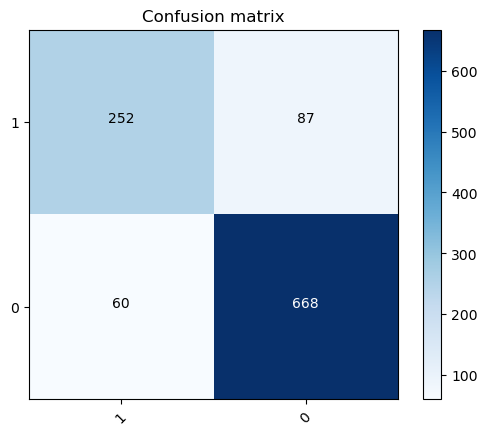

In [91]:
print("KNN")
y_pred = knn_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
labels = ['1', '0']

plot_confusion_matrix(cm, classes = labels)
print('Accuracy = ', classification_report(y_test, y_pred, digits=4))

SVM
Confusion matrix, without normalization
[[263  76]
 [ 33 695]]
Accuracy =                precision    recall  f1-score   support

         0.0     0.8885    0.7758    0.8283       339
         1.0     0.9014    0.9547    0.9273       728

    accuracy                         0.8978      1067
   macro avg     0.8950    0.8652    0.8778      1067
weighted avg     0.8973    0.8978    0.8959      1067



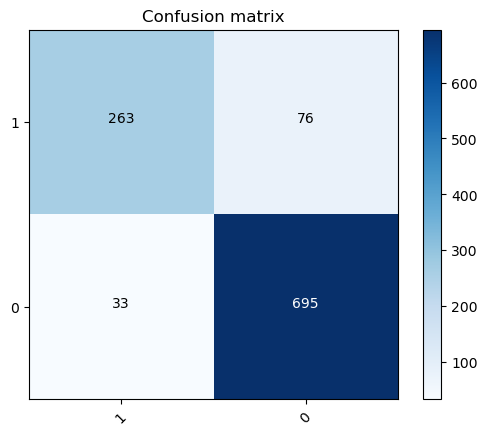

In [10]:
print("SVM")
y_pred = svm_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
labels = ['1', '0']

plot_confusion_matrix(cm, classes = labels)
print('Accuracy = ', classification_report(y_test, y_pred, digits=4))

RBF-SVM
Confusion matrix, without normalization
[[245  94]
 [ 14 714]]
Accuracy =                precision    recall  f1-score   support

         0.0     0.9459    0.7227    0.8194       339
         1.0     0.8837    0.9808    0.9297       728

    accuracy                         0.8988      1067
   macro avg     0.9148    0.8517    0.8745      1067
weighted avg     0.9035    0.8988    0.8946      1067



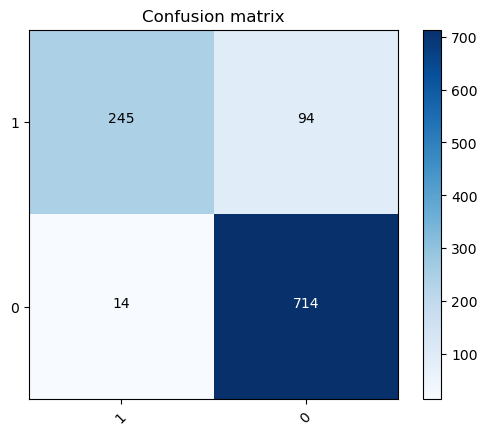

In [93]:
print("RBF-SVM")
y_pred = k_svm_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
labels = ['1', '0']

plot_confusion_matrix(cm, classes = labels)

print('Accuracy = ', classification_report(y_test, y_pred, digits=4))

Decision Tree
Confusion matrix, without normalization
[[232 107]
 [110 618]]
Accuracy =                precision    recall  f1-score   support

         0.0     0.6784    0.6844    0.6814       339
         1.0     0.8524    0.8489    0.8507       728

    accuracy                         0.7966      1067
   macro avg     0.7654    0.7666    0.7660      1067
weighted avg     0.7971    0.7966    0.7969      1067



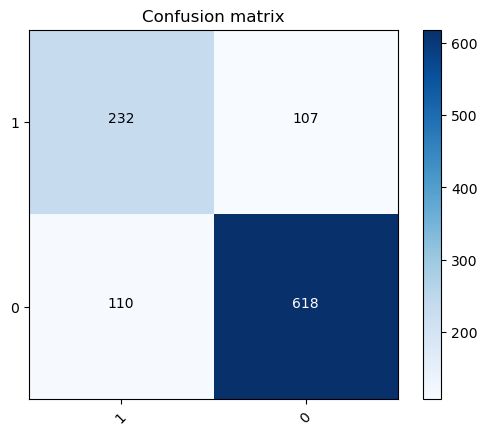

In [94]:
print("Decision Tree")
y_pred = dt_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
labels = ['1', '0']

plot_confusion_matrix(cm, classes = labels)
print('Accuracy = ', classification_report(y_test, y_pred, digits=4))

Random Forest
Confusion matrix, without normalization
[[239 100]
 [ 61 667]]
Accuracy =                precision    recall  f1-score   support

         0.0     0.7967    0.7050    0.7480       339
         1.0     0.8696    0.9162    0.8923       728

    accuracy                         0.8491      1067
   macro avg     0.8331    0.8106    0.8202      1067
weighted avg     0.8464    0.8491    0.8465      1067



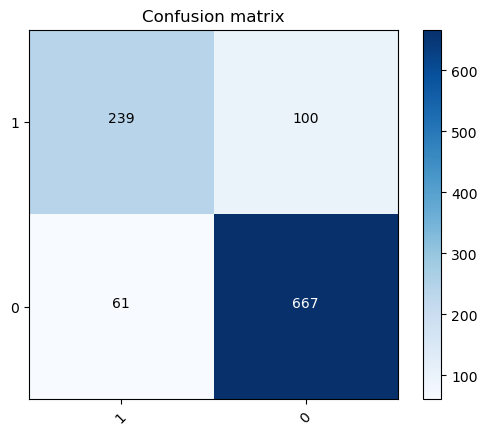

In [95]:
print("Random Forest")
y_pred = rf_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
labels = ['1', '0']

plot_confusion_matrix(cm, classes = labels)
print('Accuracy = ', classification_report(y_test, y_pred, digits=4))